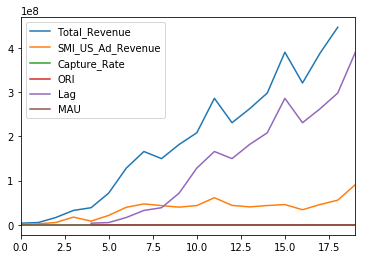

In [93]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AR
from pylab import rcParams
from sklearn.feature_selection import RFE

# files = ["Facebook_File.csv","Twitter_File.csv","Google_File.csv","Snap_File.csv"]
# from filename in files:
#     file = filename

file = "Snap_File.csv"

df = pd.read_csv(file)
df.head()
df.plot()
pyplot.show()

In [94]:
df.columns
df = pd.get_dummies(df)
#dummy = pd.get_dummies(df['Quarter'])
#df= pd.concat([df,dummy],axis = 1)
print(df.head())
df.isnull().any()
print(df.columns)
df = df.fillna(method = 'ffill')
df = df.interpolate(method ='linear', limit_direction ='backward')
df = df.interpolate(method = 'linear',limit_direction = 'forward',limit = 1)

   Total_Revenue  SMI_US_Ad_Revenue  Capture_Rate     ORI        Lag  MAU  \
0      3920000.0          882352.94      0.225090     NaN        NaN   80   
1      5300000.0         2312778.24      0.436373     NaN        NaN   86   
2     16730000.0         5497875.57      0.328624     NaN        NaN   94   
3     32720000.0        17617242.81      0.540222     NaN        NaN  107   
4     38800000.0         8557367.48      0.235861  217.74  3920000.0  122   

   Time_2015-Q1  Time_2015-Q2  Time_2015-Q3  Time_2015-Q4  ...  Time_2018-Q3  \
0             1             0             0             0  ...             0   
1             0             1             0             0  ...             0   
2             0             0             1             0  ...             0   
3             0             0             0             1  ...             0   
4             0             0             0             0  ...             0   

   Time_2018-Q4  Time_2019-Q1  Time_2019-Q2  Time_2019-Q

In [95]:
##model with MAU and Capture Rate
def ModelA(df):
    X = df[['SMI_US_Ad_Revenue','Lag','MAU','ORI','Capture_Rate','Quarter_Q1',
       'Quarter_Q2', 'Quarter_Q3', 'Quarter_Q4'] ]
    y = df['Total_Revenue'].values.reshape(-1,1)
    return X,y

In [96]:
##model with Capture Rate and without MAU

def ModelB(df):
    X = df[['SMI_US_Ad_Revenue','Lag','Capture_Rate','Quarter_Q1',
       'Quarter_Q2', 'Quarter_Q3', 'Quarter_Q4'] ]
    y = df['Total_Revenue'].values.reshape(-1,1)
    return X,y


In [97]:
##model without MAU and Capture Rate
def ModelC(df):
    X = df[['SMI_US_Ad_Revenue','Lag','Quarter_Q1',
        'Quarter_Q2', 'Quarter_Q3', 'Quarter_Q4'] ]
    y = df['Total_Revenue'].values.reshape(-1,1)  
    return X,y

In [98]:
X,y = ModelA(df)

In [99]:
from sklearn.model_selection import train_test_split

test_percentage = .66
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= test_percentage, shuffle = False, random_state=42)
#X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42)




In [100]:
from sklearn.preprocessing import StandardScaler
def scaler(X_train,y_train,X_test):
    #X_scaler = StandardScaler().fit(X_train)
    #y_scaler = StandardScaler().fit(y_train)
    #X_test = X_test.values.reshape(1, -1)
    #y_train = y_train.reshape(-1,1)
    X_train_scaled = StandardScaler().fit(X_train).transform(X_train)
    X_test_scaled = StandardScaler().fit(X_train).transform(X_test)
    y_train_scaled = StandardScaler().fit(y_train).transform(y_train)
    return X_train_scaled,y_train_scaled,X_test_scaled
def scaler_y_test(y_test,y_train):
    y_test_scaled = StandardScaler().fit(y_train).transform(y_test)
    return y_test_scaled

X_train_scaled,y_train_scaled,X_test_scaled, = scaler(X_train,y_train,X_test)
y_test_scaled = scaler_y_test(y_test,y_train)

C:\Users\agarg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\agarg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  import sys
C:\Users\agarg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\agarg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


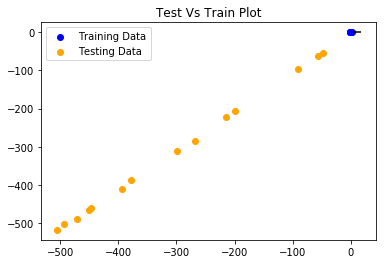

In [101]:
model = LinearRegression()
#predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled,y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Test Vs Train Plot")
plt.show()



In [102]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet


def run_model(model):
    execute_model(X_train_scaled,y_train_scaled,model,X_test_scaled,y_test_scaled)
        
def execute_model(X_train_scaled,y_train_scaled,model,X_test_scaled,y_test_scaled):
    z = modelfit(model,X_train_scaled,y_train_scaled)
    blah = predictions(z,X_test_scaled)
    print(f"MSE:{MSE(y_test_scaled,blah)}")
    print(f"R2:{r2(model,X_test_scaled, y_test_scaled)}")
    
def modelfit(a,X_train_scaled, y_train_scaled):
    model = a.fit(X_train_scaled, y_train_scaled)
    print("model name: ",a)
    return model

def predictions(model,X_test_scaled):
    predictions = model.predict(X_test_scaled)
    #print(predictions)
    print("the intercept is: " , model.intercept_)
    print("the coeff is: " ,model.coef_)
    return predictions
def MSE(y_test_scaled,predictions):
    mse = mean_squared_error(y_test_scaled, predictions)
    #print(f"MSE: {mse}")
    return mse
def r2(model,X_test_scaled, y_test_scaled):
    R2 = model.score(X_test_scaled, y_test_scaled)
    #print(f"R2: {R2}")
    return R2

def modelselection(models,y_test_scaled,X_test_scaled):
    R2_dict = {}
    mse_dict = {}
    for model in models:
        run_model(model)
        predictions = model.predict(X_test_scaled)
        mse = MSE(y_test_scaled,predictions)
        R2= r2(model,X_test_scaled,y_test_scaled)
        R2_dict.update({model:R2})
        mse_dict.update({model:mse})
    best_model_R2 = max(R2_dict, key=R2_dict.get)
    #best_model_mse = min(mse_dict,key=mse_dict.get)
    return best_model_R2


In [103]:
models = [LinearRegression(),Lasso(alpha = 0.01),Ridge(alpha=.01),ElasticNet()]

best_model_R2 = modelselection(models,y_test_scaled,X_test_scaled)
print(best_model_R2)

model name:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
the intercept is:  [-3.08005579e-14]
the coeff is:  [[ 0.33078198  0.07218462  0.60350688 -0.07218462 -0.04198501  0.02404573
  -0.01819807  0.01876003 -0.02615679]]
MSE:128085.60852840789
R2:-6462.088958982318
model name:  Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
the intercept is:  [-2.35837209e-16]
the coeff is:  [ 0.28446073  0.12414643  0.63345413 -0.         -0.05906443  0.
 -0.          0.0034192  -0.        ]
MSE:1700.5877924562312
R2:-84.81018829110918
model name:  Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
the intercept is:  [-3.13339276e-14]
the coeff is:  [[ 0.33041774  0.07344458  0.60087643 -0.07344458 -0.04232389  0.02400097
  -0.0186592

In [104]:
def Q42019(X,y):
    X_train = X.iloc[0:-1]
    #print(X_train)
    #print(X_train.shape)
    y_train = y[0:-1]
    #print(y_train.shape)
    #print(y_train)
    X_test = X.iloc[-1].values.reshape(1,-1)
    #print(X_test.shape)
    #print(X_test)
    return X_train,y_train,X_test

def Q32019(X,y):
    X_train = X.iloc[0:-2]
    #print(X_train.shape)
    y_train = y[0:-2]
    #print(y_train.shape)
    X_test = X.iloc[-2].values.reshape(1,-1)
    #print(X_test.shape)
    return X_train,y_train,X_test

def Q22019(X,y):
    X_train = X.iloc[0:-3]
    #print(X_train.shape)
    y_train = y[0:-3]
    #print(y_train.shape)
    X_test = X.iloc[-3].values.reshape(1,-1)
    #print(X_test.shape)
    return X_train,y_train,X_test

def Q12019(X,y):
    X_train = X.iloc[0:-4]
    #print(X_train.shape)
    y_train = y[0:-4]
    #print(y_train.shape)
    X_test = X.iloc[-4].values.reshape(1,-1)
    #print(X_test.shape)
    return X_train,y_train,X_test

def finalprediction(X_train,y_train,X_test,best_model_R2):
    X_train_scaled,y_train_scaled,X_test_scaled, = scaler(X_train,y_train,X_test)
    regressor = best_model_R2
    #print("the model used is: " , regressor)
    regressor.fit(X_train_scaled, y_train_scaled)
    a = regressor.predict(X_test_scaled)
    y_new = StandardScaler().fit(y_train).inverse_transform(a)
    #print(int(y_new))
    return(int(y_new))

In [105]:
files = ["Snap_File.csv"]
#,"Twitter_File.csv","Google_File.csv","Snap_File.csv"]
#models = [LinearRegression(),Lasso(alpha = 0.01),Ridge(alpha=.01),ElasticNet()]

def value_predictions(best_model_R2,files,X_train,y_train,X_test,X,y):
    for file_name in files:
        file = file_name
        print(file)
        df = pd.read_csv(file)
#         df.head()
#         df.plot()
#         pyplot.show()
        
        df = pd.get_dummies(df)
        #print(df.head())
        df.isnull().any()
        #print(df.columns)
        df = df.fillna(method = 'ffill')
        df = df.interpolate(method ='linear', limit_direction ='backward')
        df = df.interpolate(method = 'linear',limit_direction = 'forward',limit = 1)
        value = finalprediction(X_train,y_train,X_test,best_model_R2)
        return value
        

In [106]:
### Model A prediction

print("ModelA")
X,y = ModelA(df)
print("Prediction for Q1 2019")
X_train,y_train,X_test = Q12019(X,y)
value = value_predictions(best_model_R2,files,X_train,y_train,X_test,X,y)
print (value)
print("Prediction for Q2 2019")
X_train,y_train,X_test = Q22019(X,y)
value = value_predictions(best_model_R2,files,X_train,y_train,X_test,X,y)
print (value)
print("Prediction for Q3 2019")
X_train,y_train,X_test = Q32019(X,y)
value = value_predictions(best_model_R2,files,X_train,y_train,X_test,X,y)
print (value)

print("Prediction for Q4 2019")
X_train,y_train,X_test = Q42019(X,y)
value = value_predictions(best_model_R2,files,X_train,y_train,X_test,X,y)
print (value)

ModelA
Prediction for Q1 2019
Snap_File.csv
289837592
Prediction for Q2 2019
Snap_File.csv


C:\Users\agarg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\agarg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  import sys
C:\Users\agarg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\agarg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\agarg\AppData\Local\

352154655
Prediction for Q3 2019
Snap_File.csv
407599882
Prediction for Q4 2019
Snap_File.csv
570759730


C:\Users\agarg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\agarg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  import sys
C:\Users\agarg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\agarg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\agarg\AppData\Local\

In [107]:
### Model B prediction
print("ModelB")

X,y = ModelB(df)
print("Prediction for Q1 2019")
X_train,y_train,X_test = Q12019(X,y)
value = value_predictions(best_model_R2,files,X_train,y_train,X_test,X,y)
print (value)
print("Prediction for Q2 2019")
X_train,y_train,X_test = Q22019(X,y)
value = value_predictions(best_model_R2,files,X_train,y_train,X_test,X,y)
print (value)
print("Prediction for Q3 2019")
X_train,y_train,X_test = Q32019(X,y)
value = value_predictions(best_model_R2,files,X_train,y_train,X_test,X,y)
print (value)
print("Prediction for Q4 2019")
X_train,y_train,X_test = Q42019(X,y)
value = value_predictions(best_model_R2,files,X_train,y_train,X_test,X,y)
print (value)

ModelB
Prediction for Q1 2019
Snap_File.csv
285886135
Prediction for Q2 2019
Snap_File.csv


C:\Users\agarg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\agarg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  import sys
C:\Users\agarg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\agarg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\agarg\AppData\Local\Continuum\anaconda3\lib\site

353263273
Prediction for Q3 2019
Snap_File.csv
410784396
Prediction for Q4 2019
Snap_File.csv
588775637


C:\Users\agarg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\agarg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  import sys
C:\Users\agarg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\agarg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\agarg\AppData\Local\Continuum\anaconda3\lib\site

In [108]:
### Model C prediction
print("ModelC")

X,y = ModelC(df)
print("Prediction for Q1 2019")
X_train,y_train,X_test = Q12019(X,y)
value = value_predictions(best_model_R2,files,X_train,y_train,X_test,X,y)
print (value)
print("Prediction for Q2 2019")
X_train,y_train,X_test = Q22019(X,y)
value = value_predictions(best_model_R2,files,X_train,y_train,X_test,X,y)
print (value)
print("Prediction for Q3 2019")
X_train,y_train,X_test = Q32019(X,y)
value = value_predictions(best_model_R2,files,X_train,y_train,X_test,X,y)
print (value)
print("Prediction for Q4 2019")
X_train,y_train,X_test = Q42019(X,y)
value = value_predictions(best_model_R2,files,X_train,y_train,X_test,X,y)
print (value)

ModelC
Prediction for Q1 2019
Snap_File.csv
289190998
Prediction for Q2 2019
Snap_File.csv


C:\Users\agarg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\agarg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  import sys
C:\Users\agarg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\agarg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\agarg\AppData\Local\Continuum\anaconda3\lib\site

354824817
Prediction for Q3 2019
Snap_File.csv
414730000
Prediction for Q4 2019
Snap_File.csv
593306450


C:\Users\agarg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  import sys
C:\Users\agarg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\agarg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\agarg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  import sys
C:\Users\agarg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessi